# Monte Carlo Error Analysis - Vanilla Options

In [1]:
import fineng_irfx as fe
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
plot_dir = r"plots/ErrorAnalysis/"

In [3]:
class price_vanilla:
    def __init__(self, S0, sigma, r, T, K, isCall, m, RNG):
        self.S0 = S0
        self.sigma = sigma
        self.r = r
        self.BSModel = fe.L4_BSModel(S0, r, sigma, RNG)

        self.T = T
        self.K = K
        self.m = m
        self.isCall = isCall
        self.RNG = RNG
        self.DB = fe.L4_Vanilla(T, m, K, isCall)

    def price_path(self, path_count):
        self.BSModel = fe.L4_BSModel(self.S0, self.r, self.sigma, self.RNG)
        price_mc = self.DB.PriceByMC(self.BSModel, path_count)
        error_mc = self.DB.GetPricingError
        return price_mc, error_mc

    def price_m(self, m, path_count):
        self.DB = fe.L4_Vanilla(self.T, m, self.K, self.isCall)
        price_mc = self.DB.PriceByMC(self.BSModel, path_count)
        error_mc = self.DB.GetPricingError
        return price_mc, error_mc

In [4]:
BM = fe.L4_BoxMuller(1)

In [5]:
S0 = 100.0
r = 0.05
sigma = 0.2
T = 5.0
K = 100
m = 100

# Vanilla Option
DBKO_call = price_vanilla(S0, sigma, r, T, K, True, m, BM)
DBKO_put = price_vanilla(S0, sigma, r, T, K, False, m, BM)

In [6]:
# running analytics

call_prices = []
call_errors = []
put_prices = []
put_errors = []

path_list = [int(10**i) for i in np.linspace(2, 4, 300)]

for n in path_list:
    price_mc, error_mc = DBKO_call.price_path(n)
    call_prices.append(price_mc)
    call_errors.append(error_mc)

    price_mc, error_mc = DBKO_put.price_path(n)
    put_prices.append(price_mc)
    put_errors.append(error_mc)

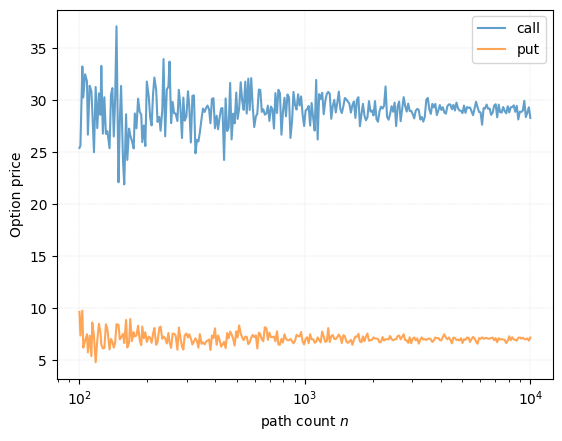

In [7]:
save_path = plot_dir + "price_scaling.png"

plt.figure()
plt.xscale("log")
plt.plot(path_list, call_prices, label="call", alpha=0.7, linewidth=1.5)
plt.plot(path_list, put_prices, label="put", alpha=0.7, linewidth=1.5)
plt.legend()
plt.grid(color="grey", linewidth=0.3, linestyle="--", alpha=0.3)
plt.xlabel(r"path count $n$")
plt.ylabel(r"Option price")
if save_path:
    plt.savefig(save_path)
plt.show()

In [8]:
n_log = np.log10(np.array(path_list))
call_errors_log = np.log10(np.array(call_errors))
put_errors_log = np.log10(np.array(put_errors))

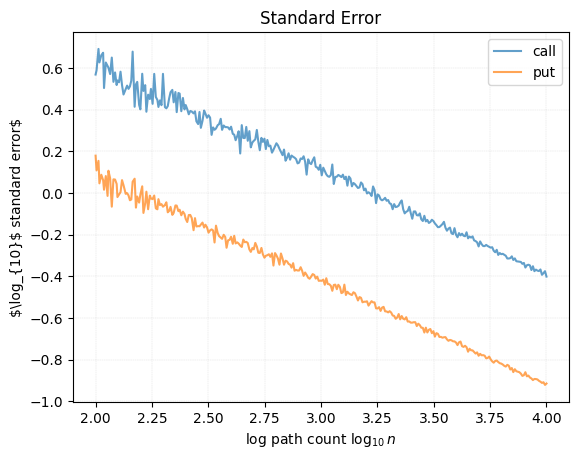

In [9]:
save_path = plot_dir + "error_scaling.png"

plt.figure()
plt.title("Standard Error")
plt.plot(n_log, call_errors_log, label="call", alpha=0.7, linewidth=1.5)
plt.plot(n_log, put_errors_log, label="put", alpha=0.7, linewidth=1.5)
plt.legend()
plt.grid(color="grey", linewidth=0.3, linestyle="--", alpha=0.3)
plt.xlabel(r"log path count $\log_{10} n$")
plt.ylabel(r"$\log_{10}$ standard error$")
if save_path:
    plt.savefig(save_path)
plt.show()